In [65]:
import numpy as np
import pandas as pd
INPUT_DIR='m5-forecasting-accuracy/'
cal_data=pd.read_csv(INPUT_DIR+'calendar.csv')
salestv_data=pd.read_csv(INPUT_DIR+'sales_train_validation.csv')
ss_data=pd.read_csv(INPUT_DIR+'sample_submission.csv')

In [66]:
timesteps=14
startDay=0

In [67]:
salestv_data.shape

(30490, 1919)

In [68]:
salestv_data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [69]:
cal_data=pd.read_csv(INPUT_DIR+'calendar.csv')
cal_data.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [70]:
cal_data.shape

(1969, 14)

In [71]:
ss_data.tail()

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
60975,FOODS_3_823_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60976,FOODS_3_824_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60977,FOODS_3_825_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60978,FOODS_3_826_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60979,FOODS_3_827_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
salestv_data.describe()

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
count,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,...,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000
mean,1.070220,1.041292,0.780026,0.833454,0.627944,0.958052,0.918662,1.244080,1.073663,0.838701,...,1.370581,1.586159,1.693670,1.248245,1.232207,1.159167,1.149000,1.328862,1.605838,1.633158
std,5.126689,5.365468,3.667454,4.415141,3.379344,4.785947,5.059495,6.617729,5.917204,4.206199,...,3.740017,4.097191,4.359809,3.276925,3.125471,2.876026,2.950364,3.358012,4.089422,3.812248
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000
max,360.000000,436.000000,207.000000,323.000000,296.000000,314.000000,316.000000,370.000000,385.000000,353.000000,...,129.000000,160.000000,204.000000,98.000000,100.000000,88.000000,77.000000,141.000000,171.000000,130.000000


In [73]:
salestv_data.isnull()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30486,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30487,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30488,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [74]:
print(salestv_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1919 entries, id to d_1913
dtypes: int64(1913), object(6)
memory usage: 446.4+ MB
None


In [76]:
# To reduce memory usage
def downcast_dtypes(df):
    float_cols = [c for c in df if df[c].dtype == 'float64']
    int_cols = [c for c in df if df[c].dtype in ['int32', 'int64']]
    df[float_cols] = df[float_cols].astype(np.float32)
    df[int_cols] = df[int_cols].astype(np.int16)
    return df

In [77]:
salestv_data_downcast = downcast_dtypes(salestv_data)

In [78]:
salestv_data_downcast.shape

(30490, 1919)

In [79]:
print(salestv_data_downcast.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1919 entries, id to d_1913
dtypes: int16(1913), object(6)
memory usage: 112.6+ MB
None


In [80]:
# Making dates as row to get the data in exact format
salestv_data_downcast = salestv_data_downcast.T

In [81]:
salestv_data_downcast.head(8)

,0,1,2,3,4,5,6,7,8,9,...,30480,30481,30482,30483,30484,30485,30486,30487,30488,30489
id,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation,HOBBIES_1_004_CA_1_validation,HOBBIES_1_005_CA_1_validation,HOBBIES_1_006_CA_1_validation,HOBBIES_1_007_CA_1_validation,HOBBIES_1_008_CA_1_validation,HOBBIES_1_009_CA_1_validation,HOBBIES_1_010_CA_1_validation,...,FOODS_3_818_WI_3_validation,FOODS_3_819_WI_3_validation,FOODS_3_820_WI_3_validation,FOODS_3_821_WI_3_validation,FOODS_3_822_WI_3_validation,FOODS_3_823_WI_3_validation,FOODS_3_824_WI_3_validation,FOODS_3_825_WI_3_validation,FOODS_3_826_WI_3_validation,FOODS_3_827_WI_3_validation
item_id,HOBBIES_1_001,HOBBIES_1_002,HOBBIES_1_003,HOBBIES_1_004,HOBBIES_1_005,HOBBIES_1_006,HOBBIES_1_007,HOBBIES_1_008,HOBBIES_1_009,HOBBIES_1_010,...,FOODS_3_818,FOODS_3_819,FOODS_3_820,FOODS_3_821,FOODS_3_822,FOODS_3_823,FOODS_3_824,FOODS_3_825,FOODS_3_826,FOODS_3_827
dept_id,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,...,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3
cat_id,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,...,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS
store_id,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,...,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3
state_id,CA,CA,CA,CA,CA,CA,CA,CA,CA,CA,...,WI,WI,WI,WI,WI,WI,WI,WI,WI,WI
d_1,0,0,0,0,0,0,0,12,2,0,...,0,14,1,0,4,0,0,0,0,0
d_2,0,0,0,0,0,0,0,15,0,0,...,0,11,1,0,4,0,0,6,0,0


In [82]:
salestv_data_downcast.shape

(1919, 30490)

In [83]:
#remove first 6 rows as we do not need that to feed to our model
salestv_data_downcast = salestv_data_downcast[6+startDay:]
salestv_data_downcast.head(8)

,0,1,2,3,4,5,6,7,8,9,...,30480,30481,30482,30483,30484,30485,30486,30487,30488,30489
d_1,0,0,0,0,0,0,0,12,2,0,...,0,14,1,0,4,0,0,0,0,0
d_2,0,0,0,0,0,0,0,15,0,0,...,0,11,1,0,4,0,0,6,0,0
d_3,0,0,0,0,0,0,0,0,7,1,...,0,5,1,0,2,2,0,0,0,0
d_4,0,0,0,0,0,0,0,0,3,0,...,0,6,1,0,5,2,0,2,0,0
d_5,0,0,0,0,0,0,0,0,0,0,...,0,5,1,0,2,0,0,2,0,0
d_6,0,0,0,0,0,0,0,4,2,0,...,0,13,2,0,7,3,5,4,0,0
d_7,0,0,0,0,0,0,0,6,3,0,...,0,18,1,0,8,1,0,1,0,0
d_8,0,0,0,0,0,0,0,5,9,0,...,0,13,3,0,4,4,1,8,0,0


In [86]:
# create a dataframe with zeores for 1969 days in the calendar - 
#To store the knowledge if an event exist in the next day
daysBeforeEvent = pd.DataFrame(np.zeros((1969,1)))

In [87]:
daysBeforeEvent.shape

(1969, 1)

In [88]:
cal_data.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [89]:
# "1" is assigned to the days before the event_name_1. 
for x, y in cal_data.iterrows():
    if x!=0 and (pd.isnull(cal_data['event_name_1'][x]) == False):
        daysBeforeEvent[0][x-1]=1

/var/folders/1d/v5byvd4j3yd6xsvkhmrw63lm0000gp/T/ipykernel_40839/196718236.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  daysBeforeEvent[0][x-1]=1


In [90]:
# daysBeforeEvent is used as a feature and also to train and test the validations 
daysBeforeEventTest = daysBeforeEvent[1913:1941]
daysBeforeEventTrain = daysBeforeEvent[startDay:1913]
print(daysBeforeEventTest.shape)
print(daysBeforeEventTest)

(28, 1)
        0
1913  0.0
1914  0.0
1915  0.0
1916  0.0
1917  1.0
1918  1.0
1919  0.0
1920  0.0
1921  0.0
1922  1.0
1923  0.0
1924  0.0
1925  1.0
1926  0.0
1927  0.0
1928  0.0
1929  0.0
1930  0.0
1931  0.0
1932  0.0
1933  0.0
1934  0.0
1935  0.0
1936  0.0
1937  0.0
1938  0.0
1939  0.0
1940  0.0


In [91]:
daysBeforeEventTrain.columns = ['oneDayBeforeEvent']
daysBeforeEventTrain.index = salestv_data_downcast.index

In [92]:
final_data = pd.concat([salestv_data_downcast, daysBeforeEventTrain], axis=1)
final_data

,0,1,2,3,4,5,6,7,8,9,...,30481,30482,30483,30484,30485,30486,30487,30488,30489,oneDayBeforeEvent
d_1,0,0,0,0,0,0,0,12,2,0,...,14,1,0,4,0,0,0,0,0,0.0
d_2,0,0,0,0,0,0,0,15,0,0,...,11,1,0,4,0,0,6,0,0,0.0
d_3,0,0,0,0,0,0,0,0,7,1,...,5,1,0,2,2,0,0,0,0,0.0
d_4,0,0,0,0,0,0,0,0,3,0,...,6,1,0,5,2,0,2,0,0,0.0
d_5,0,0,0,0,0,0,0,0,0,0,...,5,1,0,2,0,0,2,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_1909,1,1,1,0,1,0,1,4,0,0,...,1,1,0,0,0,0,1,1,0,0.0
d_1910,3,0,0,1,2,0,0,6,0,0,...,3,3,0,2,1,0,0,0,0,0.0
d_1911,0,0,1,3,2,2,0,3,0,2,...,1,6,0,3,0,0,0,3,0,0.0
d_1912,1,0,1,7,2,0,1,2,0,0,...,0,0,4,2,0,1,1,1,0,0.0


In [93]:
# Feature scaling
# Scale the features using MinMaxScaler in range 0-1
from sklearn.preprocessing import MinMaxScaler
final_data.columns = final_data.columns.astype(str)

sc = MinMaxScaler(feature_range=(0,1))
final_data_scaled = sc.fit_transform(final_data)

final_data_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.16666667, ..., 0.25      , 0.        ,
        0.        ],
       [0.2       , 0.        , 0.16666667, ..., 0.08333333, 0.        ,
        0.        ],
       [0.2       , 0.        , 0.16666667, ..., 0.25      , 0.        ,
        0.        ]])

In [94]:
final_data_scaled.shape

(1913, 30491)

Here is the important part. "X_train" and "y_train" data is created. For each X_train item, 14 past days' sales and 14 daysBeforeEvent feature are included. So one element of X_train's shape is (14, 30491). For y_train we are predicting one day sales of 30490 items therefore one element of y_train's shape is (1, 30490)

In [95]:
# creating sequences for LSTM model training
X_train = []
y_train = []

for i in range(timesteps,len(final_data_scaled)):
    X_train.append(final_data_scaled[i-timesteps:i])
    y_train.append(final_data_scaled[i][0:30490])
    #İmportant!! if extra features are added (like oneDayBeforeEvent) 
    #use only sales values for predictions (we only predict sales) 
    #this is why 0:30490 columns are choosen

In [96]:
del final_data_scaled
del cal_data

In [97]:
X_train = np.array(X_train)
y_train = np.array(y_train)
print(X_train.shape)
print(y_train.shape)

(1899, 14, 30491)
(1899, 30490)


# LSTM model - keras implementation

In [98]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Initializing the RNN
regressor = Sequential()

# Adding first LSTM layer and some dropout regularization
layer_1_units = 40
regressor.add(LSTM(units=layer_1_units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

# Adding second LSTM layer and some dropout regularization
layer_2_units = 300
regressor.add(LSTM(units=layer_2_units, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding third LSTM layer and some dropout regularization``
layer_3_units = 300
regressor.add(LSTM(units=layer_3_units))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units=30490))

# Compiling the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

#Fitting the RNN to the trainign set
epoch_no = 32
batch_size_RNN = 44
regressor.fit(X_train, y_train, epochs=epoch_no, batch_size=batch_size_RNN)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/32
44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 190ms/step - loss: 0.0179
Epoch 2/32
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 186ms/step - loss: 0.0139
Epoch 3/32
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 190ms/step - loss: 0.0133
Epoch 4/32
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 202ms/step - loss: 0.0131
Epoch 5/32
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 207ms/step - loss: 0.0130
Epoch 6/32
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 203ms/step - loss: 0.0128
Epoch 7/32
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 209ms/step - loss: 0.0127
Epoch 8/32
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 211ms/step - loss: 0.0125
Epoch 9/32
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 210ms/step - loss: 0.0124
Epoch 10/32
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 219ms/step - loss: 0.0123
Epoch 11/32
44/44 ━━━━━━━━━━━━━━━━━━━━ 14s 314ms/step - loss: 0.0123
Epoch 12/32
44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 239ms/step - loss: 0.0122
Epoch 13/32
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 221ms/step - loss: 0.0121
Epoch 14/32
44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 235ms/step - loss: 0.0120
Epoch 15/32
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 230ms

In [99]:
inputs = final_data[-timesteps:]
inputs = sc.transform(inputs)
print(inputs)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.08333333 0.         0.        ]
 [0.         0.         0.16666667 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.16666667 ... 0.25       0.         0.        ]
 [0.2        0.         0.16666667 ... 0.08333333 0.         0.        ]
 [0.2        0.         0.16666667 ... 0.25       0.         0.        ]]


* Here is again an important part.
* We are using last 14 days in order to predict day 1915 sales.
* In order to predict 1916th day, 13 days from our input data and 1 day from our prediction are used. After that we slide the window one by one.  
    12 days from input data + 2 days from our prediction to predict 1917th day  
    11 days from input data + 3 days from our prediction to predict 1918th day  
    .....  
    14 days our prediction to predict last 1941th day sale  

In [100]:
X_test = []
X_test.append(inputs[0:timesteps])
X_test = np.array(X_test)
print(X_test.shape)
#print(X_test[0, 1:14].shape)
predictions = []

for j in range(timesteps, timesteps+28):
    predicted_sales = regressor.predict(X_test[0, j-timesteps:j].reshape(1, timesteps,30491))
    testInput = np.column_stack((np.array(predicted_sales), daysBeforeEventTest[0][1913+j-timesteps]))
    X_test = np.append(X_test, testInput).reshape(1, j+1, 30491)
    predicted_sales = sc.inverse_transform(testInput)[:,0:30490]
    predictions.append(predicted_sales)
print(testInput.shape)

(1, 14, 30491)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/s

# File submission

<Axes: >

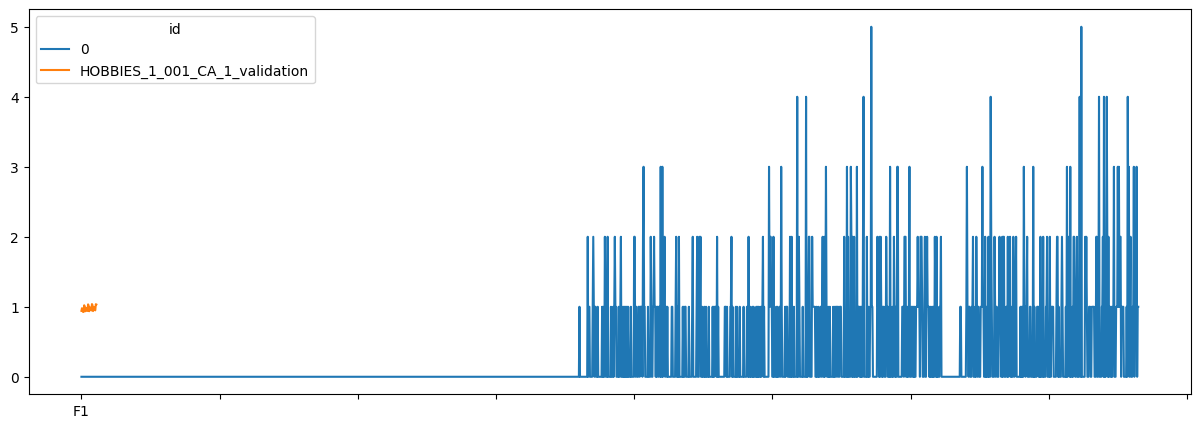

In [102]:
import time
import matplotlib.pyplot as plt

submission = pd.DataFrame(data=np.array(predictions).reshape(28,30490))
submission = submission.T
submission = pd.concat((submission, submission), ignore_index=True)


sample_submission = pd.read_csv('m5-forecasting-accuracy/sample_submission.csv')
idColumn = sample_submission[['id']]
submission[['id']] = idColumn

cols = list(submission.columns)
cols = cols[-1:]+cols[:-1]
submission = submission[cols]

colsdname = ['id'] + [f'F{i}' for i in range(1,29)]
submission.columns = colsdname

currrentDatTime = time.strftime('%d%m%Y_%H%M%S')
submission.to_csv('submission.csv', index=False)

fig,axs = plt.subplots(figsize=(15,5))
d_cols = [c for c in salestv_data.columns if 'd_' in c]
salestv_data[salestv_data['id'] == 'HOBBIES_1_001_CA_1_validation'][d_cols].T.plot(ax=axs)
submission[submission['id'] == 'HOBBIES_1_001_CA_1_validation'].set_index('id').T.plot(ax=axs)

In [103]:
submission.shape

(60980, 29)

In [104]:
sample_submission.shape

(60980, 29)